## **EARTHQUAKE PREDICTION MODEL USING PYTHON**





---







# ***Uploading_dataset***

In data analysis and machine learning, working with datasets is a fundamental task. To get started, we need to upload our dataset into our Python environment. we have uploaded a dataset using the popular pandas library. Pandas simplifies the process of working with structured data, making it an ideal choice for handling datasets in Python.

In [67]:
!pip install pandas
import pandas as pd
dataset = pd.read_csv('bronze.csv')
print(dataset.head())    # Display the first few rows
print(dataset.info())    # Display information about columns and data types
print(dataset.describe()) # Display summary statistics
print(dataset)


                       time  latitude  longitude  depth  mag magType  nst  \
0  1930-12-08T08:01:02.000Z    23.261    120.277   15.0  6.3      mw  NaN   
1  1930-12-03T18:51:47.000Z    18.233     96.298   10.0  7.4      mw  NaN   
2  1930-12-02T07:01:30.000Z    25.854     98.356   35.0  6.2      mw  NaN   
3  1930-11-28T07:32:56.000Z    18.779   -106.767   15.0  6.3      mw  NaN   
4  1930-11-25T19:02:53.000Z    35.050    139.129   15.0  6.9      mw  NaN   

   gap  dmin  rms  ...                   updated place type  horizontalError  \
0  NaN   NaN  NaN  ...  2015-05-13T18:52:43.000Z   NaN  NaN              NaN   
1  NaN   NaN  NaN  ...  2015-05-13T18:52:43.000Z   NaN  NaN              NaN   
2  NaN   NaN  NaN  ...  2015-05-13T18:52:43.000Z   NaN  NaN              NaN   
3  NaN   NaN  NaN  ...  2015-05-13T18:52:43.000Z   NaN  NaN              NaN   
4  NaN   NaN  NaN  ...  2015-05-13T18:52:43.000Z   NaN  NaN              NaN   

   depthError  magError  magNst  status  locationSource 

# ***Preprocessing***

Before extracting meaningful insights or building accurate machine learning models, we must preprocess our dataset. Data preprocessing involves a series of steps to clean, transform, and structure your data for analysis.

In [68]:
print(dataset.isnull().sum())






# Specify the columns you want to delete (e.g., 'column1', 'column2')
columns_to_delete = ['place','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource']

# Use the drop method to delete the specified columns
dataset.drop(columns=columns_to_delete, inplace=True, errors='ignore')

# The specified columns are deleted from the dataset.
print(dataset)


time                    0
latitude                0
longitude               0
depth                   5
mag                     0
magType               106
nst                375388
gap                326417
dmin               594208
rms                182951
net                     0
id                      0
updated                 0
place              797046
type               797046
horizontalError    797046
depthError         797046
magError           797046
magNst             797046
status             797046
locationSource     797046
magSource          797046
dtype: int64
                            time  latitude  longitude   depth  mag magType  \
0       1930-12-08T08:01:02.000Z   23.2610   120.2770   15.00  6.3      mw   
1       1930-12-03T18:51:47.000Z   18.2330    96.2980   10.00  7.4      mw   
2       1930-12-02T07:01:30.000Z   25.8540    98.3560   35.00  6.2      mw   
3       1930-11-28T07:32:56.000Z   18.7790  -106.7670   15.00  6.3      mw   
4       1930-11-25T19:02:

# ***Data Visualization***

Data visualization is a fundamental part of data analysis. It helps us to understand our dataset, identify patterns, and communicate your findings to others. In this guide, we will explore how to create informative and visually appealing data visualizations using Python, with a focus on the Matplotlib and Seaborn libraries.

                       time  latitude  longitude  depth  mag magType  nst  \
0  1930-12-08T08:01:02.000Z    23.261    120.277   15.0  6.3      mw  NaN   
1  1930-12-03T18:51:47.000Z    18.233     96.298   10.0  7.4      mw  NaN   
2  1930-12-02T07:01:30.000Z    25.854     98.356   35.0  6.2      mw  NaN   
3  1930-11-28T07:32:56.000Z    18.779   -106.767   15.0  6.3      mw  NaN   
4  1930-11-25T19:02:53.000Z    35.050    139.129   15.0  6.9      mw  NaN   

   gap  dmin  rms     net            id                   updated  
0  NaN   NaN  NaN  iscgem  iscgem907791  2015-05-13T18:52:43.000Z  
1  NaN   NaN  NaN  iscgem  iscgem907777  2015-05-13T18:52:43.000Z  
2  NaN   NaN  NaN  iscgem  iscgem907773  2015-05-13T18:52:43.000Z  
3  NaN   NaN  NaN  iscgem  iscgem907769  2015-05-13T18:52:43.000Z  
4  NaN   NaN  NaN  iscgem  iscgem907761  2015-05-13T18:52:43.000Z  
            latitude      longitude          depth            mag  \
count  797046.000000  797046.000000  797041.000000  797046.0

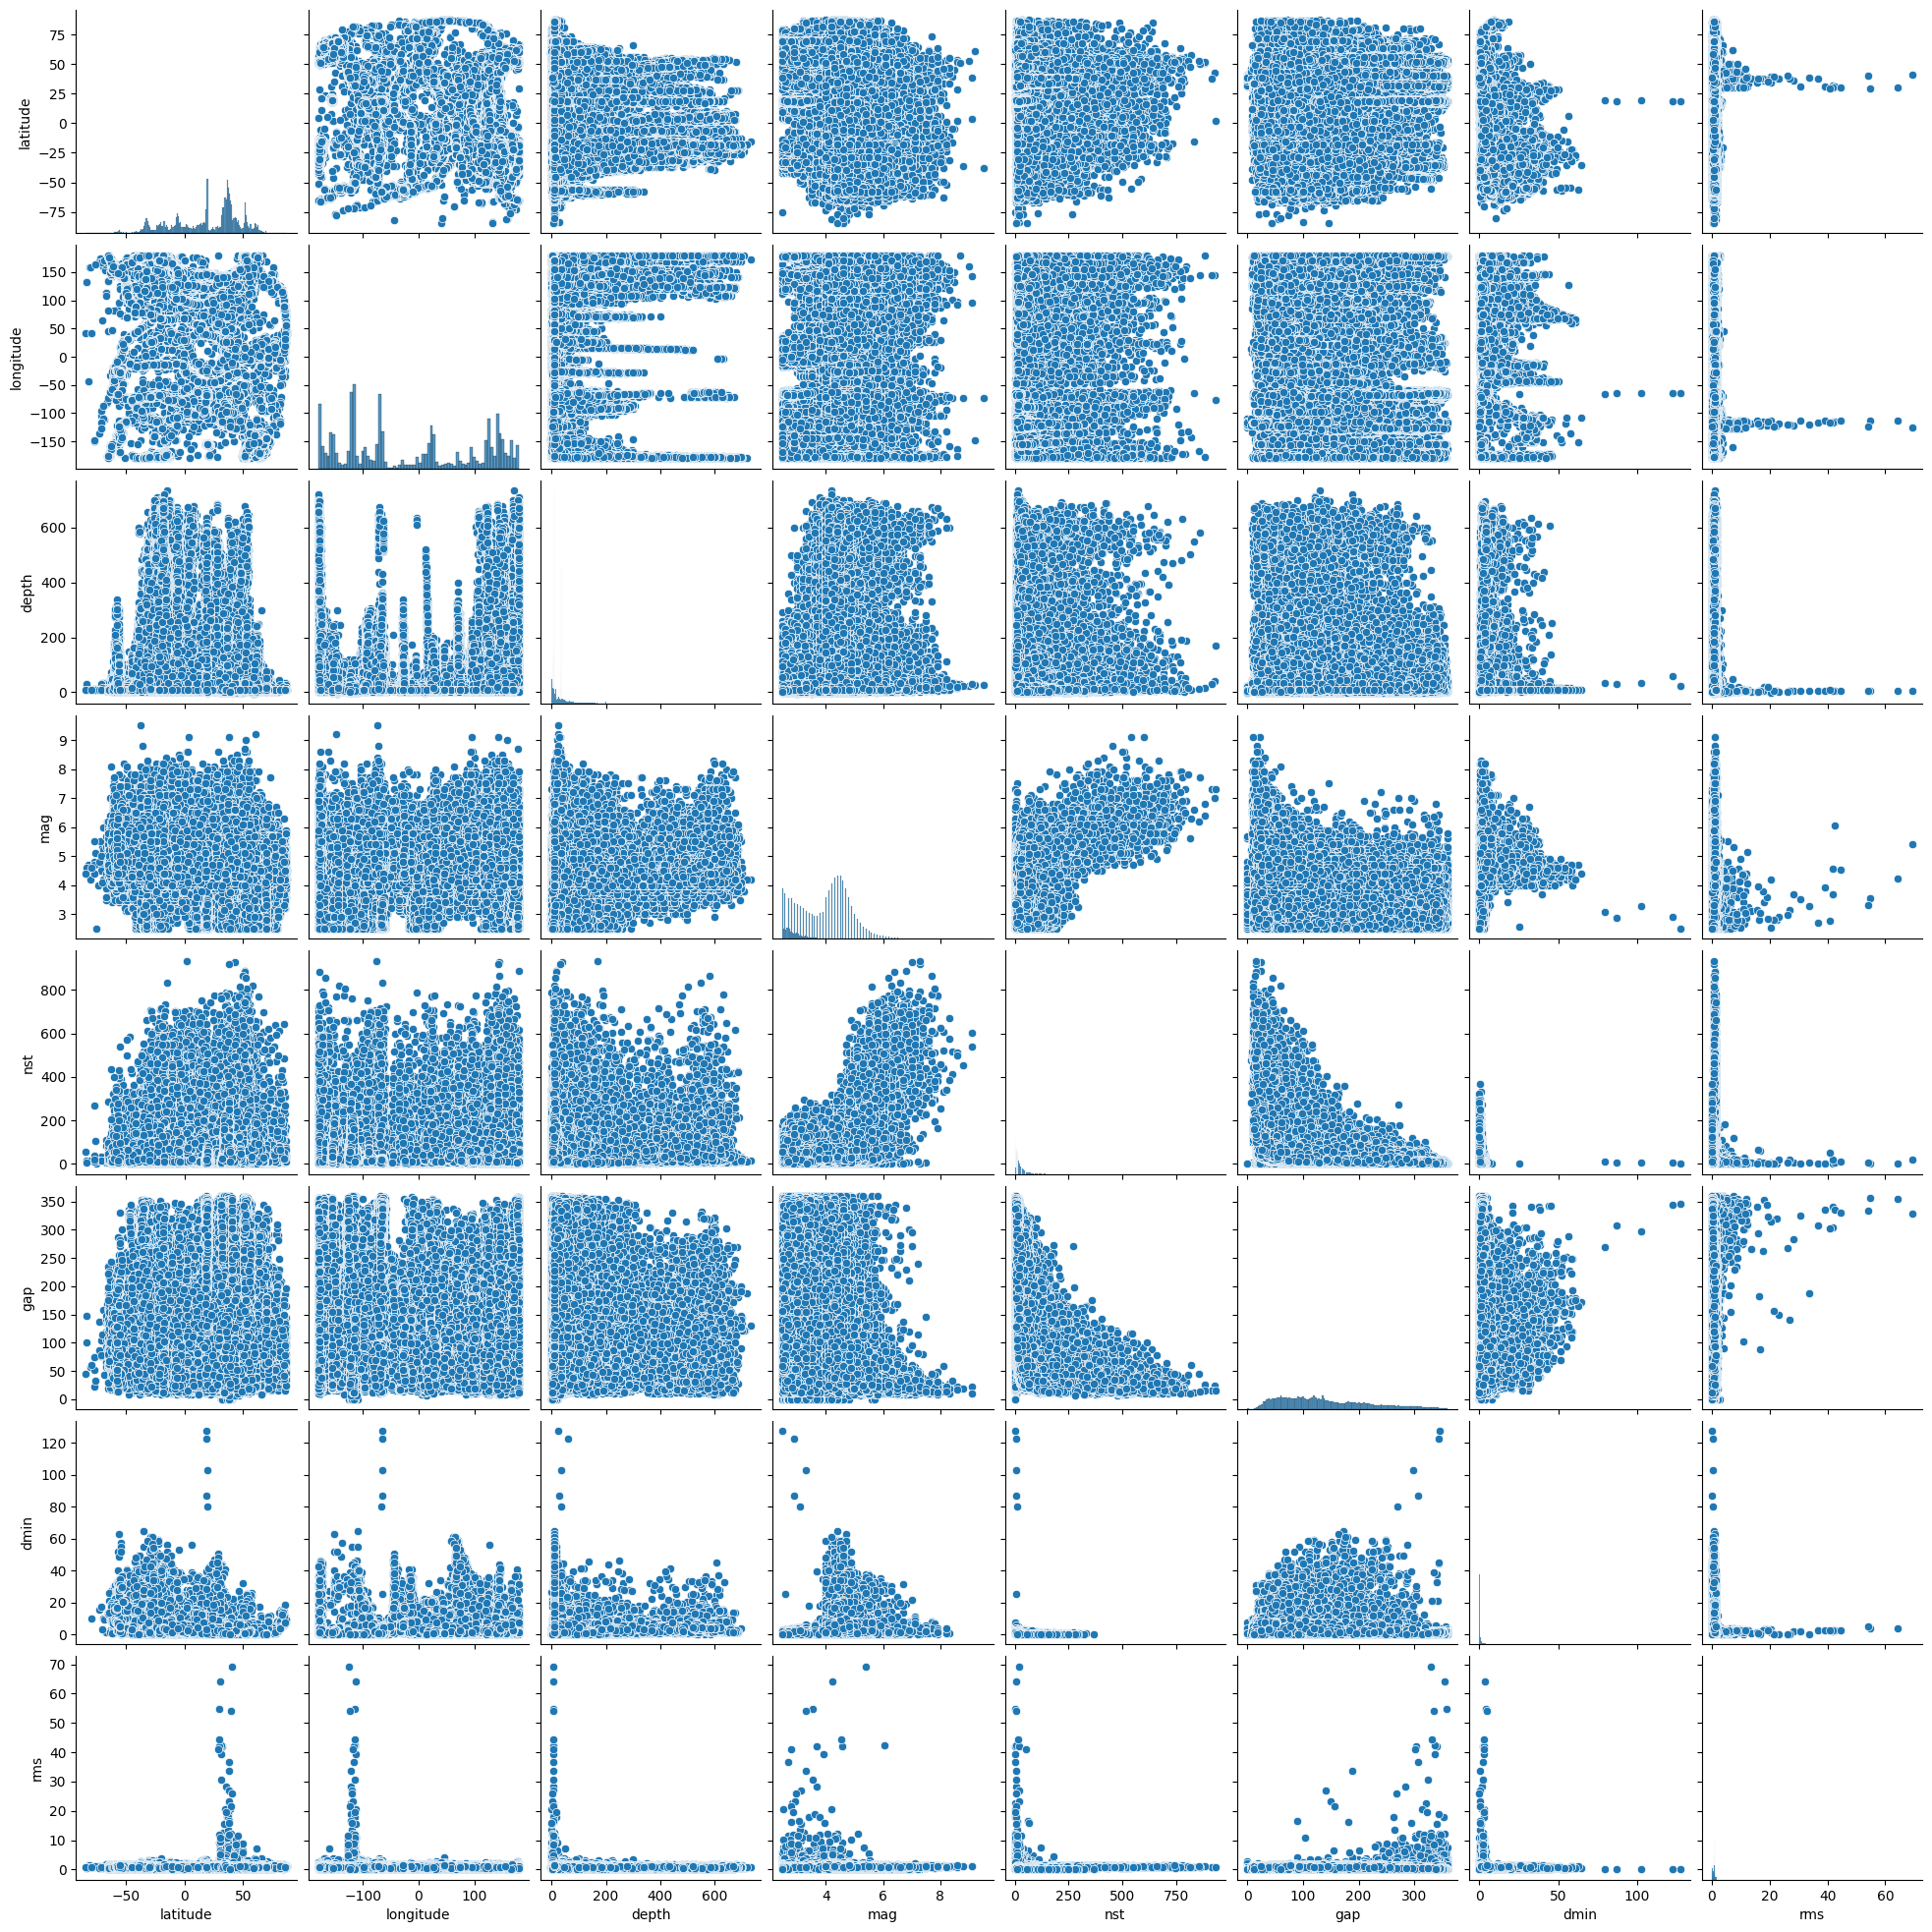

In [69]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

print(dataset.head())
print(dataset.describe())
print(dataset.dtypes)
sns.pairplot(dataset)
plt.show()


<ipython-input-70-26dfcbc1272d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")


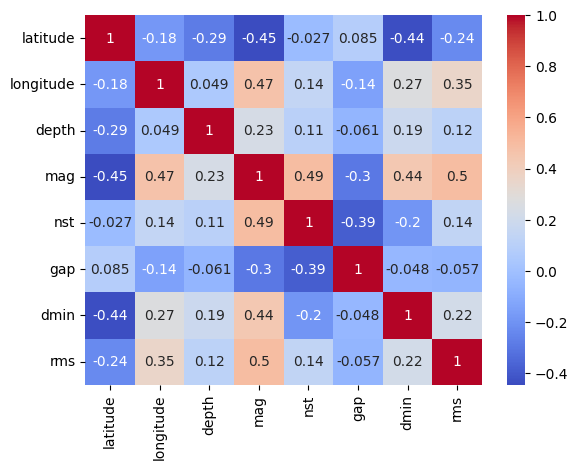

In [70]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()


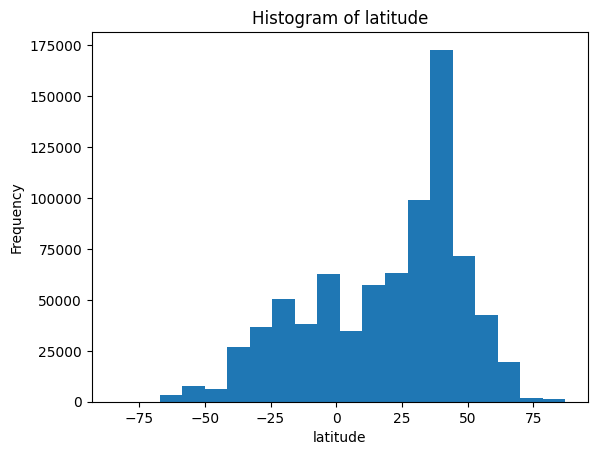

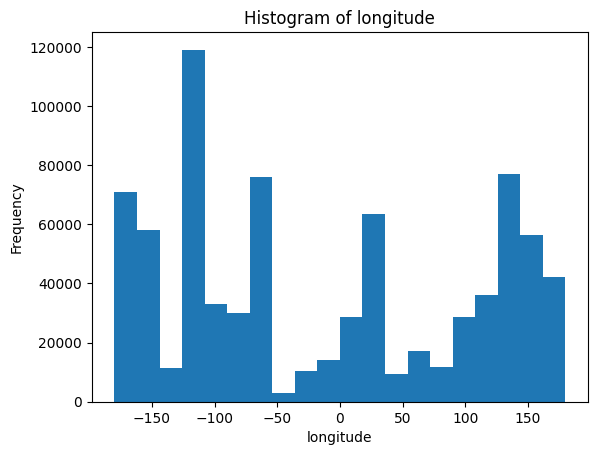

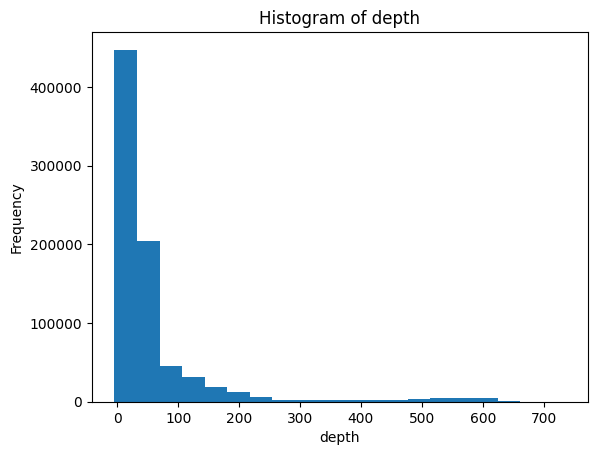

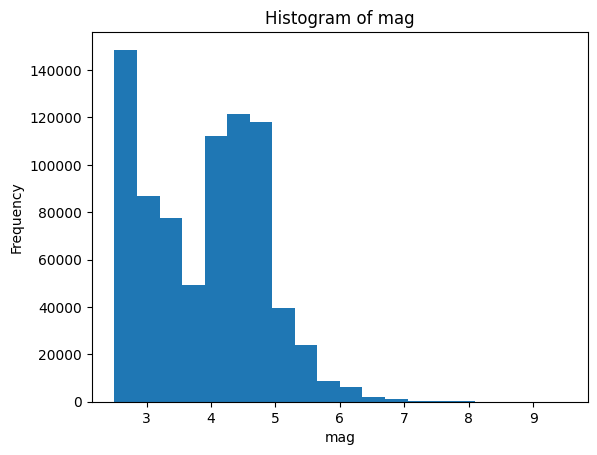

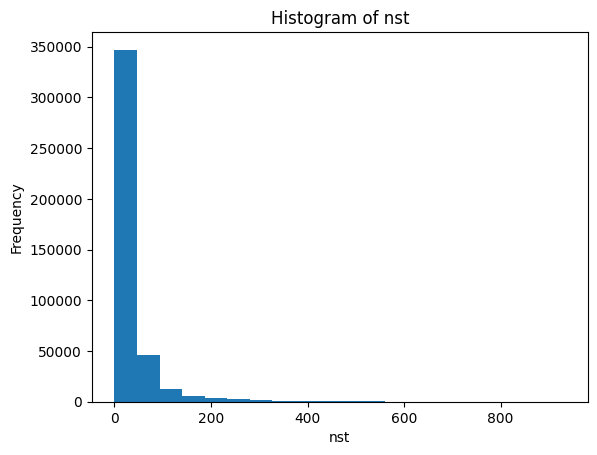

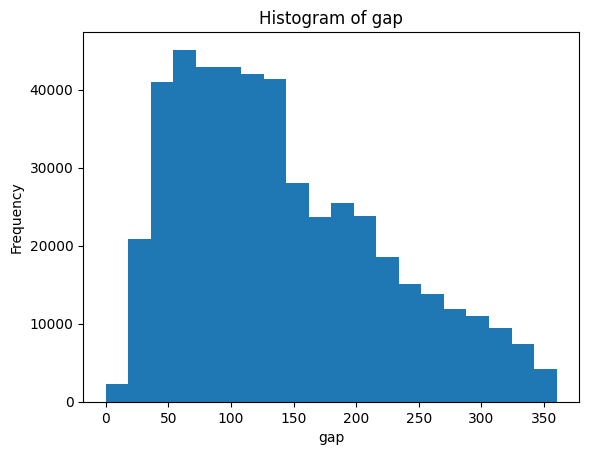

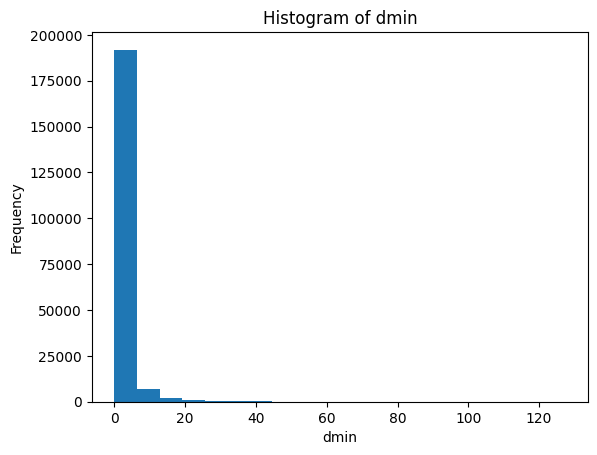

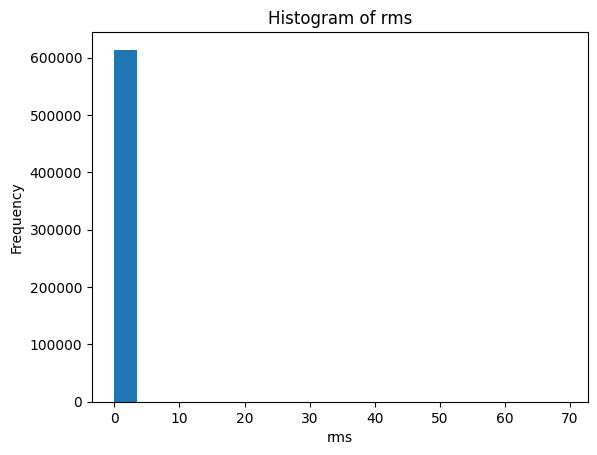

In [71]:
for column in dataset.select_dtypes(include=['int', 'float']):
    plt.hist(dataset[column], bins=20)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()


# ***Splitting as train and test data***

In the field of machine learning, building accurate and reliable models is essential. To achieve this, we need to carefully divide our dataset into two distinct parts: the training set and the test set. This process is known as train-test split, and it plays a fundamental role in model development and evaluation.

**The Importance of Train-Test Split:**

The primary goal of any machine learning model is to generalize well to unseen data. In other words, the model should not only perform excellently on the data it was trained on but also on new, unseen data. Train-test split helps us achieve this goal by providing a way to assess how well our model is likely to perform in real-world scenarios.

**Understanding the Train and Test Sets:**

**Training Set**: This is the portion of your dataset that you use to train your machine learning model. The model learns patterns and relationships within the training set, making it capable of making predictions.

**Test Set**: The test set is used to evaluate the model's performance. It's a separate portion of the dataset that the model has never seen during training. This helps you gauge how well the model generalizes to new, unseen data.

In [74]:
from sklearn.model_selection import train_test_split
import numpy as np


dataset.drop(columns=['time','magType','net','id','updated','nst','gap','dmin','rms'], inplace=True, errors='ignore')
# Specify your features (X) and target variable (y)
dataset=dataset.dropna()
X = dataset.drop('mag', axis=1)  # Features (exclude the target column)
y = dataset['mag']  # Target variable


# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())


# The 'test_size' parameter controls the size of the test set, and 'random_state' sets a seed for randomization.


         latitude   longitude    depth
562370  -3.471000  100.588000   35.000
611385  31.998667 -115.158333    6.014
17499   15.573000  -92.536000  124.800
705970  33.812500  141.700100   10.000
76980   39.333000   20.372000   33.000


In [75]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)



# ***Model Development***

Neural networks, inspired by the structure of the human brain, have revolutionized the field of machine learning and artificial intelligence. These models, composed of interconnected artificial neurons, have shown remarkable performance in tasks like image recognition, natural language processing, and much more. In this guide, we will walk you through the process of developing neural network models.

**Understanding Neural Networks**:

1. **Neurons**: In a neural network, each neuron (or node) processes information and passes it to the next layer. Input features are fed into the input layer, and the network's output is derived from the final layer.

2. **Hidden Layers**: In addition to the input and output layers, neural networks often contain one or more hidden layers. These layers perform complex calculations, enabling the network to capture intricate patterns in the data.

**Steps in Model Development**:

1. **Data Preparation**:
   - Collect and preprocess your data. Ensure it's in a format suitable for training a neural network.
   - Split your dataset into training and testing sets for model evaluation.

2. **Model Architecture**:
   - Decide the structure of your neural network. This includes the number of layers, the number of neurons in each layer, and the activation functions.
   - Select the appropriate loss function for your specific task (e.g., mean squared error for regression or categorical cross-entropy for classification).

3. **Training**:
   - Use an optimizer (e.g., Adam or stochastic gradient descent) to minimize the loss and adjust the model's weights.
   - Define the number of training epochs and batch size. Experiment with these hyperparameters to achieve the best performance.

4. **Evaluation**:
   - Assess your model's performance using metrics such as accuracy, mean squared error, precision, recall, or F1 score, depending on your task.
   - Validate the model on a separate test set to gauge its ability to generalize to new data.

5. **Fine-tuning and Optimization**:
   - Based on the evaluation results, fine-tune your model. This may involve adjusting hyperparameters, adding regularization techniques, or altering the architecture.

6. **Deployment**:
   - Once satisfied with your model's performance, deploy it in a production environment. This can involve creating an API, integrating it into a web application, or using it in a real-time system.



Developing neural network models is an iterative and creative process. The performance of your model depends not only on the network's architecture but also on your data, preprocessing steps, and hyperparameter choices. Continuously experiment, evaluate, and refine your model to achieve the best possible results in your machine learning tasks.

In [84]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load and preprocess your dataset
# Assuming you have features X and target variable y
# You can use the code for train-test split mentioned earlier

# Define your neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Adjust the number of units for your specific task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Choose an appropriate loss function
print(X_train)
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # You can adjust the number of epochs and batch size

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
print(predictions)


[[  -3.471     100.588      35.      ]
 [  31.998667 -115.15833     6.014   ]
 [  15.573     -92.536     124.8     ]
 ...
 [  20.325      95.03       33.      ]
 [  60.204    -152.4238     88.4     ]
 [  37.4945   -118.37067     3.186   ]]
Epoch 1/10
19926/19926 [==============================] - 43s 2ms/step - loss: 0.5437
Epoch 2/10
19926/19926 [==============================] - 46s 2ms/step - loss: 0.3592
Epoch 3/10
19926/19926 [==============================] - 46s 2ms/step - loss: 0.3403
Epoch 4/10
19926/19926 [==============================] - 54s 3ms/step - loss: 0.3344
Epoch 5/10
19926/19926 [==============================] - 43s 2ms/step - loss: 0.3306
Epoch 6/10
19926/19926 [==============================] - 38s 2ms/step - loss: 0.3281
Epoch 7/10
19926/19926 [==============================] - 37s 2ms/step - loss: 0.3264
Epoch 8/10
19926/19926 [==============================] - 38s 2ms/step - loss: 0.3247
Epoch 9/10
19926/19926 [==============================] - 39s 2ms/step -

# ***Manual Prediction***


So, we've successfully trained a machine learning model, and now it's time to put it to work. In this guide, we'll walk you through the process of making manual predictions using your pre-developed model. Whether you're predicting real estate prices, classifying images, or solving complex problems, this guide will help you understand how to leverage your model for specific predictions.

**Prerequisites**:

Before you can make manual predictions, ensure that you have the following in place:

1. **Trained Model**: You should have a pre-trained machine learning model ready to use.

2. **Data Preprocessing**: Make sure that you've preprocessed your input data in the same way as you did during model training.

**Steps for Manual Predictions**:

1. **Load the Pre-trained Model**:

   - Start by loading the pre-trained model into your development environment. This might involve using libraries like `joblib` for scikit-learn models or `tf.keras.models.load_model` for TensorFlow/Keras models.

2. **Collect Input Data**:

   - Depending on your use case, you might collect input data through user input, a file, or an API call. This input data should be structured in the same way as the data used during model training.

3. **Preprocess the Input Data**:

   - Data preprocessing is often a crucial step in making predictions. Ensure that the input data is transformed and prepared in the same way it was before during model training. This may involve scaling, encoding, and feature engineering.

4. **Make Predictions**:

   - Pass the preprocessed input data to your pre-trained model using the `predict` method. The model will return a prediction based on the input features.

5. **Interpret the Prediction**:

   - Depending on your problem, the model may return a numerical value, a class label, or some other kind of output. Interpret the prediction according to the context of your application.

6. **Display the Result**:

   - Show the prediction to the user, store it in a database, or use it for further decision-making, depending on the application's requirements.


Making manual predictions with your pre-trained machine learning model allows you to harness the power of your hard work and bring it to real-world use cases. By following these steps and ensuring consistency with your preprocessing and model loading, you can leverage your model effectively for specific predictions in your applications.

In [86]:

    # Collect user input (assumes a simple numerical feature)
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
depth = float(input("Enter depth: "))
    # Create a list or NumPy array with the input features
input_features = [latitude,longitude,depth]

    # Perform any necessary preprocessing on the input (e.g., scaling, encoding)

    # Make predictions
prediction = model.predict([input_features])




# Display the prediction
print("Predicted value: ", prediction)

if(prediction<6.0):
  print(" low to moderate earthquake occured")
else:
  print(" strong to catastrophic earthquake occured")


Enter latitude: 44
Enter longitude: -210
Enter depth: 124
1/1 [==============================] - 0s 54ms/step
Predicted value:  [[3.467468]]
 low to moderate earthquake occured
